
An analysis was conducted to explore the relationship between educational attainment level and income differences, comparing data from multiple nations with distinct educational frameworks.

In [ ]:
#data from OECD
#https://data-explorer.oecd.org/vis?lc=en&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_EAG_LSO_EA%40DF_LSO_EARN_DISTR_MEDIAN&df[ag]=OECD.EDU.IMEP&dq=DEU%2BUSA.M%2BF%2B_T.Y25T64.ISCED11A_6T8%2BISCED11A_6%2BISCED11A_7_8%2B_T%2BISCED11A_35_45%2BISCED11A_34_44%2BISCED11A_5%2BISCED11A_3%2BISCED11A_4%2BISCED11A_0T2%2BISCED11A_3_4%2BISCED11A_5T8...MIGT_100%2BMILE_50%2BMIGT_50_LE100%2BMIGT_100_LE150%2BMIGT_150_LE200%2BMIGT_200....EMP...OBS...A&lom=LASTNOBSERVATIONS&lo=1&pd=2013%2C2022&to[TIME_PERIOD]=true&vw=tb
#Earners distribution based on their level of earnings relative to the overall median, by age group, gender and educational attainment level
#


# Google Drive の共有リンクを指定
url_usa = "https://drive.google.com/open?id=1IEFfPQ0E-wmOw75mBaw2sy4Cbjcw08Fz&usp=drive_fs"
url_germany = "https://drive.google.com/open?id=1IBOJEBXBcGqgLLuSQWYmdMQgpku2YOfr&usp=drive_fs"


In [2]:
# 保存先のファイル名
usa_file = "USA_edu.csv"
germany_file = "germany_edu.csv"

In [3]:
# データの保存先パスを指定
usa_file_path = "C:/Users/Owner/Documents/GitHub/Grassp-25S-Education/graspp_2025_spring/notebooks/data/USA_edu.csv"
germany_file_path = "C:/Users/Owner/Documents/GitHub/Grassp-25S-Education/graspp_2025_spring/notebooks/data/germany_edu.csv"

In [4]:
# データの保存先パスを相対パスで指定
usa_file_path = "./notebooks/data/USA_edu.csv"
germany_file_path = "./notebooks/data/germany_edu.csv"

In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Owner\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd

# データの保存先パスを相対パスで指定
usa_file_path = "../../data/USA_edu.csv"
germany_file_path = "../../data/germany_edu.csv"

# データを読み込む
usa_data = pd.read_csv(usa_file_path)
germany_data = pd.read_csv(germany_file_path)

# データの先頭5行を表示
print("USA Data:")
print(usa_data.head())

print("Germany Data:")
print(germany_data.head())

USA Data:
  STRUCTURE                                       STRUCTURE_ID  \
0  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_EARN_DISTR...   
1  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_EARN_DISTR...   
2  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_EARN_DISTR...   
3  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_EARN_DISTR...   
4  DATAFLOW  OECD.EDU.IMEP:DSD_EAG_LSO_EA@DF_LSO_EARN_DISTR...   

                                      STRUCTURE_NAME ACTION REF_AREA  \
0  Earners distribution based on their level of e...      I      USA   
1  Earners distribution based on their level of e...      I      USA   
2  Earners distribution based on their level of e...      I      USA   
3  Earners distribution based on their level of e...      I      USA   
4  Earners distribution based on their level of e...      I      USA   

  Reference area SEX    Sex     AGE                  Age  ...  OBS_VALUE  \
0  United States  _T  Total  Y25T64  From 25 to 64 years  ...   6.161238   
1  Unite

In [7]:
# 収入カテゴリを変換する関数を定義
def calculate_income_mean(df):
    # 収入カテゴリと対応する値をマッピング
    income_mapping = {
        "MILE_50": 25,  # At or below 50% of median income
        "MIGT_50_LE100": 75,  # Above 50% but at or below 100% of median income
        "MIGT_100_LE150": 125,  # Above 100% but at or below 150% of median income
        "MIGT_150_LE200": 175,  # Above 150% but at or below 200% of median income
        "MIGT_200": 225  # Above 200% of median income
    }

    # マッピングを適用して新しい列を作成
    df["Income_Value"] = df["INCOME"].map(income_mapping) * df["OBS_VALUE"]

    # 教育レベルごとに平均収入を計算
    income_mean = df.groupby("ATTAINMENT_LEV")["Income_Value"].sum().reset_index()
    income_mean.rename(columns={"Income_Value": "income_mean"}, inplace=True)

    return income_mean

# USA と Germany のデータをクリーニング
usa_income_mean = calculate_income_mean(usa_data)
germany_income_mean = calculate_income_mean(germany_data)

# データをマージ
merged_data = pd.merge(usa_income_mean, germany_income_mean, on="ATTAINMENT_LEV", suffixes=("_USA", "_Germany"))

# 結果を表示
print(merged_data)

  ATTAINMENT_LEV  income_mean_USA  income_mean_Germany
0   ISCED11A_0T2      6697.087365          6347.703565
1     ISCED11A_3      8991.196334          9074.568915
2   ISCED11A_3_4      8991.196334          9241.961741
3     ISCED11A_5     10273.405004         12222.632360
4   ISCED11A_5T8     13533.939123         13414.918184
5     ISCED11A_6     13458.971238         12829.428697
6   ISCED11A_6T8     14328.419852         13601.994300
7   ISCED11A_7_8     15751.619232         15027.452672
8             _T     11341.594315         10772.842598


In [24]:
pip install matplotlib

     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.6 kB ? eta -:--:--
     ---------- -------------------------- 30.7/104.6 kB 262.6 kB/s eta 0:00:01
     ------------------------- ----------- 71.7/104.6 kB 563.7 kB/s eta 0:00:01
     ------------------------------------ 104.6/104.6 kB 674.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.1 MB 7.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/8.1 MB 7.6 MB/s eta 0:00:01
   ----- ---------------------------------- 1.1/8.1 MB 7.8 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/8.1 MB 8.8 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/8.1 MB 9.4 MB/s eta 0:00:01
   ------------- -------------------------- 2.8/8.1 MB 10.4 MB/s eta 0:00:01
   -----------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Owner\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


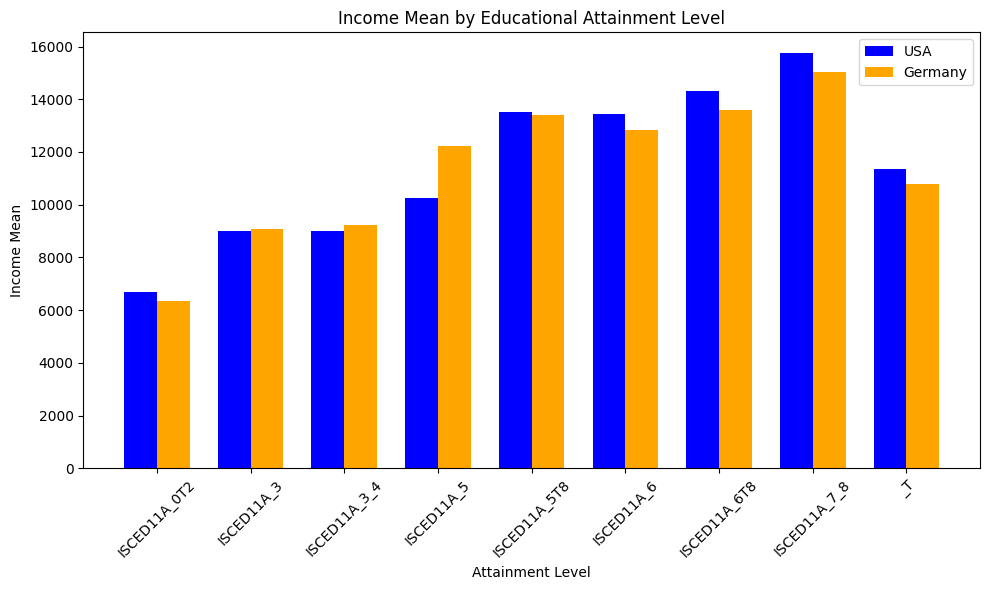

In [8]:
import matplotlib.pyplot as plt

# グラフを作成
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(merged_data["ATTAINMENT_LEV"]))

# 棒グラフを描画
plt.bar(x, merged_data["income_mean_USA"], width=bar_width, label="USA", color="blue")
plt.bar([i + bar_width for i in x], merged_data["income_mean_Germany"], width=bar_width, label="Germany", color="orange")

# グラフの装飾
plt.xlabel("Attainment Level")
plt.ylabel("Income Mean")
plt.title("Income Mean by Educational Attainment Level")
plt.xticks([i + bar_width / 2 for i in x], merged_data["ATTAINMENT_LEV"], rotation=45)
plt.legend()

# グラフを表示
plt.tight_layout()
plt.show()